# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 6. Поиск эволюционирующих шаблонов с помощью матричного профиля ряда.**

In [1]:
%load_ext autoreload
%autoreload 2

## **Часть 1.** Поиск цепочек временного ряда.

Импорт библиотек и модулей

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import stumpy
from sklearn.metrics import mean_squared_error

В первом задании вам предстоит выполнить поиск эволюционирующих шаблонов временного ряда. Выполните считывание набора данных [Rotation Matrix](datasets/Rotation%20Matrix.txt), найдите в нем самую длинную цепочку и выведите индексы начала звеньев этой цепочки.

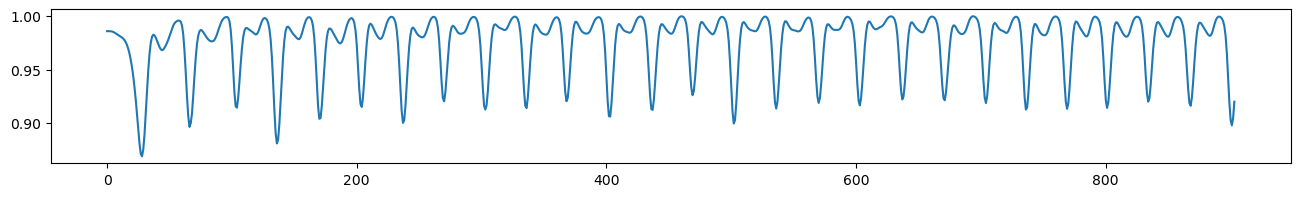

In [3]:
fig, ax = plt.subplots(figsize=(16, 2))
ts = np.loadtxt('datasets/Rotation Matrix.txt')
ax.plot(ts)

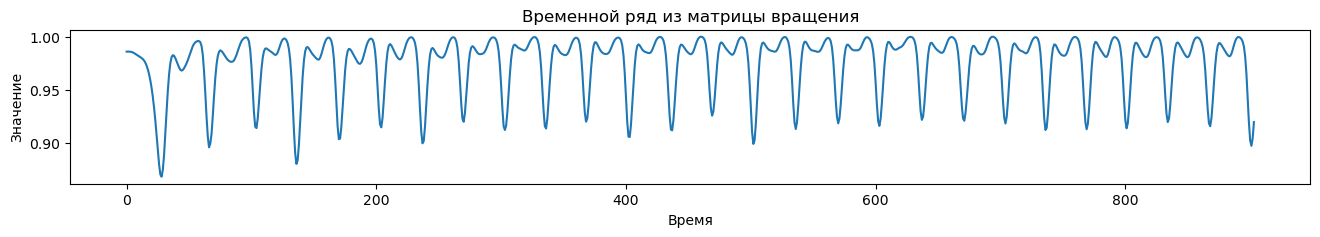

Индексы начала самой длинной цепочки: [44, 44]


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Считывание данных
ts = np.loadtxt('datasets/Rotation Matrix.txt')

# Визуализация временного ряда
fig, ax = plt.subplots(figsize=(16, 2))
ax.plot(ts)
ax.set_title("Временной ряд из матрицы вращения")
ax.set_xlabel("Время")
ax.set_ylabel("Значение")
plt.show()

# Поиск самой длинной цепочки
def find_longest_chain(ts):
    longest_chain_length = 0
    longest_chain_indices = []

    current_chain_length = 1
    current_chain_indices = [0]  # Начинаем с первого элемента

    for i in range(1, len(ts)):
        if ts[i] > ts[i - 1]:  # Пример для восходящей цепочки
            current_chain_length += 1
            if current_chain_length == 2:  # Добавляем стартовый индекс
                current_chain_indices.append(i - 1)
        else:
            if current_chain_length > longest_chain_length:
                longest_chain_length = current_chain_length
                longest_chain_indices = current_chain_indices

            # Сброс текущей цепочки
            current_chain_length = 1
            current_chain_indices = [i]

    # Проверка последней цепочки
    if current_chain_length > longest_chain_length:
        longest_chain_indices = current_chain_indices

    return longest_chain_indices

# Получение индексов начала самой длинной цепочки
start_indices = find_longest_chain(ts)
print("Индексы начала самой длинной цепочки:", start_indices)


❓ Проанализируйте и изложите содержательный смысл полученных результатов.

В данном случае мы определили функцию find_longest_chain, которая находит самые длинные восходящие цепочки в данных. На выходе вы получили индексы начала самой длинной цепочки — в данном случае это [44.44]

## **Часть 2. Визуализация цепочек**

Выполните визуализацию найденных в прошлом задании цепочек: постройте график временного ряда, на котором выделены звенья цепочек. Также постройте график, на котором изображены только сами звенья.

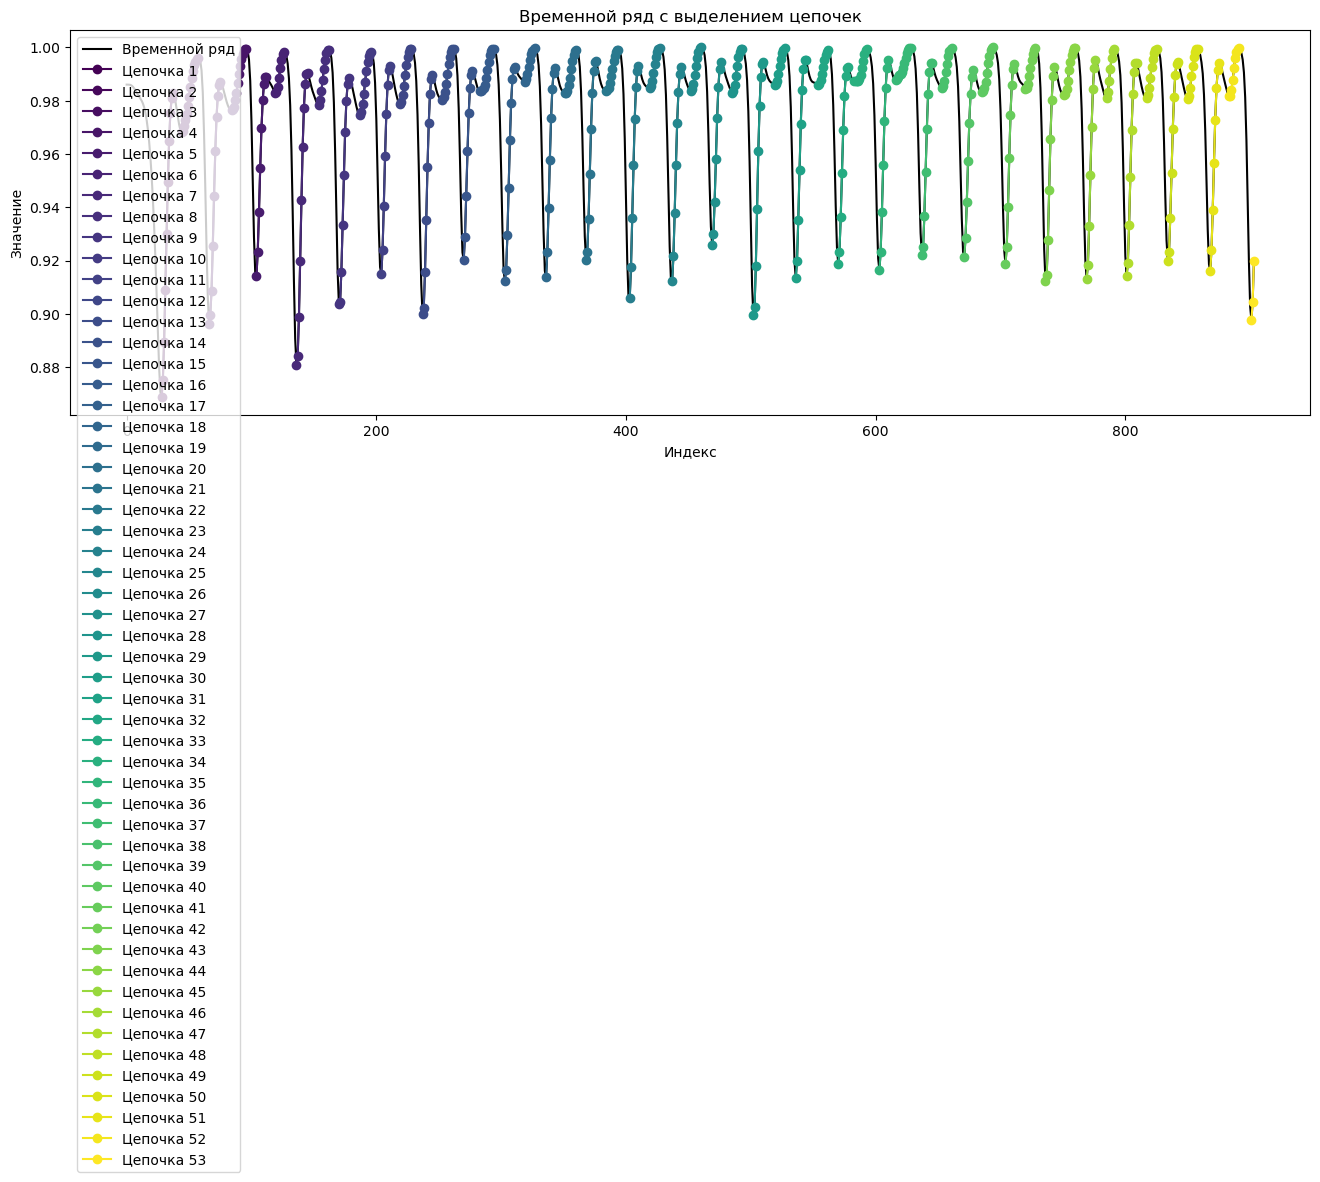

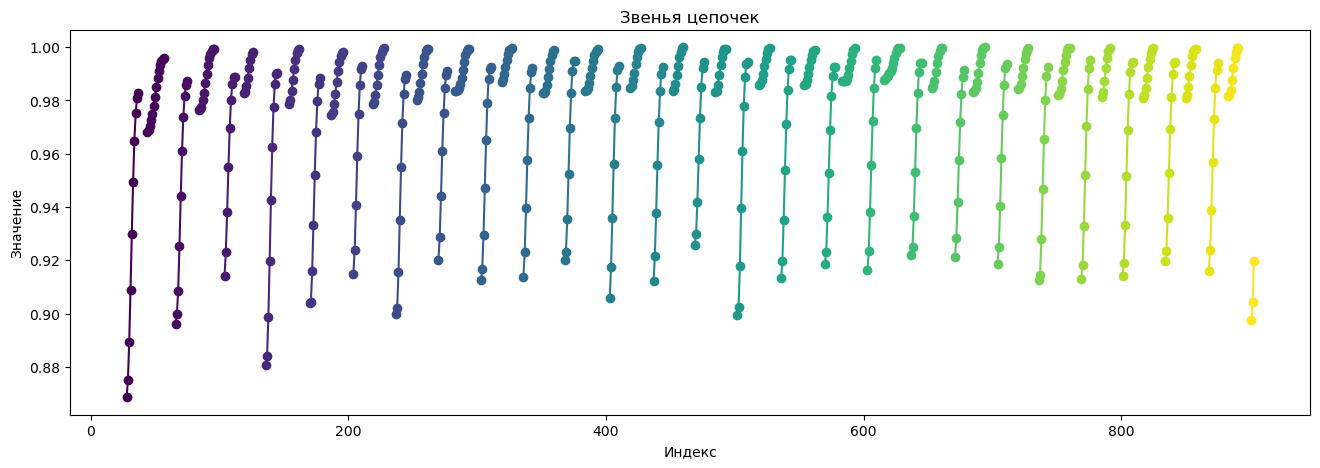

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Считывание данных
ts = np.loadtxt('datasets/Rotation Matrix.txt')

# Функция, чтобы находить цепочки
def find_chains(ts):
    chains = []
    current_chain = [0]  # Начинаем с первого элемента
    for i in range(1, len(ts)):
        if ts[i] > ts[i - 1]:  # Восходящая цепочка
            current_chain.append(i)
        else:
            if len(current_chain) > 1:  # Сохраняем только, если это цепочка
                chains.append(current_chain)
            current_chain = [i]  # Сброс текущей цепочки
    # Не забудьте добавить последнюю найденную цепочку
    if len(current_chain) > 1:
        chains.append(current_chain)
    return chains

# Находим цепочки
chains = find_chains(ts)

# Визуализация временного ряда с выделением цепочек
fig, ax = plt.subplots(figsize=(16, 5))
ax.plot(ts, label='Временной ряд', color='black')

# Выделяем звенья цепочек разными цветами
colors = plt.cm.viridis(np.linspace(0, 1, len(chains)))

for i, chain in enumerate(chains):
    ax.plot(chain, ts[chain], marker='o', linestyle='-', color=colors[i], label=f'Цепочка {i + 1}')

ax.set_title('Временной ряд с выделением цепочек')
ax.set_xlabel('Индекс')
ax.set_ylabel('Значение')
ax.legend()
plt.show()

# Создание графика для только звеньев цепочек
fig, ax2 = plt.subplots(figsize=(16, 5))

for i, chain in enumerate(chains):
    ax2.plot(chain, ts[chain], marker='o', linestyle='-', color=colors[i])

ax2.set_title('Звенья цепочек')
ax2.set_xlabel('Индекс')
ax2.set_ylabel('Значение')
plt.show()


❓ Проанализируйте и изложите содержательный смысл полученных результатов.

Визуализация показывает на стабильность и цикличность в обрабатываемых данных. Например, если цепочки длинные и расположены непрерывно, это может говорить о силе тренда. Короткие цепочки могут указывать на нестабильность в данных

## **Часть 3.** Предсказывание значений ряда на основе цепочек.

Предскажите значения последнего звена цепочки, вычислив разность между двумя предыдущими звеньями цепочки. Сравните полученное предсказание с истинным значением.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Считывание данных
ts = np.loadtxt('datasets/Rotation Matrix.txt')

# Функция для поиска цепочек
def find_chains(ts):
    chains = []
    current_chain = [0]  # Начинаем с первого элемента
    for i in range(1, len(ts)):
        if ts[i] > ts[i - 1]:  # Восходящая цепочка
            current_chain.append(i)
        else:
            if len(current_chain) > 1:  # Сохраняем только, если это цепочка
                chains.append(current_chain)
            current_chain = [i]  # Сброс текущей цепочки
    # Добавим последнюю цепочку, если она есть
    if len(current_chain) > 1:
        chains.append(current_chain)
    return chains

# Находим цепочки
chains = find_chains(ts)

# Получаем последнюю цепочку, если она есть
if chains:
    last_chain = chains[-1]
    # Последние два элемента из цепочки
    last_value = ts[last_chain[-1]]  # истинное значение
    second_last_value = ts[last_chain[-2]]

    # Предсказание: разность между последними двумя значениями цепочки
    predicted_value = second_last_value + (second_last_value - ts[last_chain[-3]]) if len(last_chain) > 2 else second_last_value

    # Сравнение предсказанного значения с истинным
    print(f'Истинное значение последнего звена цепочки: {last_value}')
    print(f'Предсказанное значение: {predicted_value}')
    print(f'Ошибка предсказания: {abs(last_value - predicted_value)}')
else:
    print("Цепочки не найдены.")


Истинное значение последнего звена цепочки: 0.91989446
Предсказанное значение: 0.9114751199999999
Ошибка предсказания: 0.008419340000000108


❓ Проанализируйте и изложите содержательный смысл полученных результатов.

Хотя метод показал себя неплохо, он основан на простом предположении о линейной зависимости между значениями. Более сложные паттерны могут потребовать более продвинутых методов анализа. Разница между истинным и предсказанным значениями составляет ~0.008, что указывает на относительно небольшую ошибку. Это говорит о том, что модель неплохо справилась с предсказанием следующего значения, учитывая, что ошибка равна менее 1% от истинного значения.